In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [60]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [56]:
data = pd.read_parquet('./data/chunks/chunk0')

In [6]:
from catboost import CatBoostClassifier

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [58]:
X = data.drop(["TARGET"], axis=1)
y = data[["TARGET"]]

In [61]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_, y_ = oversample.fit_resample(X, y)

In [62]:
sm = SMOTE(sampling_strategy='minority')
X, y = sm.fit_resample(X_, y_)

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [5]:
train, test = train_test_split(data)# X_val
X_train = train.drop(["TARGET"], axis=1)
y_train = train[["TARGET"]]

X_test = test.drop(["TARGET"], axis=1)
y_test = test[["TARGET"]]

In [99]:
model = CatBoostClassifier(iterations=20,
                           depth=15,
                           learning_rate=0.08,
                           loss_function='Logloss',
                           verbose=True)

In [100]:
model.fit(X, y)

0:	learn: 0.6613225	total: 9.37s	remaining: 2m 57s
1:	learn: 0.6279467	total: 19s	remaining: 2m 50s
2:	learn: 0.5977907	total: 28s	remaining: 2m 38s
3:	learn: 0.5678953	total: 37.2s	remaining: 2m 28s
4:	learn: 0.5503857	total: 46.2s	remaining: 2m 18s
5:	learn: 0.5295767	total: 55.3s	remaining: 2m 9s
6:	learn: 0.5100844	total: 1m 4s	remaining: 1m 59s
7:	learn: 0.4904337	total: 1m 13s	remaining: 1m 50s
8:	learn: 0.4696698	total: 1m 23s	remaining: 1m 41s
9:	learn: 0.4528647	total: 1m 32s	remaining: 1m 32s
10:	learn: 0.4375034	total: 1m 42s	remaining: 1m 23s
11:	learn: 0.4260295	total: 1m 51s	remaining: 1m 14s
12:	learn: 0.4148049	total: 2m 1s	remaining: 1m 5s
13:	learn: 0.4056836	total: 2m 10s	remaining: 55.9s
14:	learn: 0.3967431	total: 2m 20s	remaining: 46.8s
15:	learn: 0.3856915	total: 2m 30s	remaining: 37.6s
16:	learn: 0.3746469	total: 2m 39s	remaining: 28.2s
17:	learn: 0.3679229	total: 2m 48s	remaining: 18.7s
18:	learn: 0.3588675	total: 2m 57s	remaining: 9.36s
19:	learn: 0.3504081	to

In [101]:
print(classification_report(model.predict(X), y, digits=3))

              precision    recall  f1-score   support

         0.0      0.888     0.969     0.927     86323
         1.0      0.972     0.897     0.933    102043

    accuracy                          0.930    188366
   macro avg      0.930     0.933     0.930    188366
weighted avg      0.933     0.930     0.930    188366



In [48]:
y_test.value_counts()

TARGET
0.0       23518
1.0        2108
dtype: int64

In [42]:
330/2108

0.055977229601518026

In [49]:
proba = model.predict_proba(X_test[y_test.TARGET == 1])
pred= model.predict(X_test[y_test.TARGET == 1])

In [50]:
pd.DataFrame(pred).value_counts()

0.0    1990
1.0     118
dtype: int64

In [34]:
y_test[y_test.TARGET == 1]

,TARGET
8910,1.0
64630,1.0
87504,1.0
16627,1.0
97333,1.0
...,...
36283,1.0
80026,1.0
11644,1.0
93646,1.0


Accuracy: 0.90947 



<AxesSubplot: >

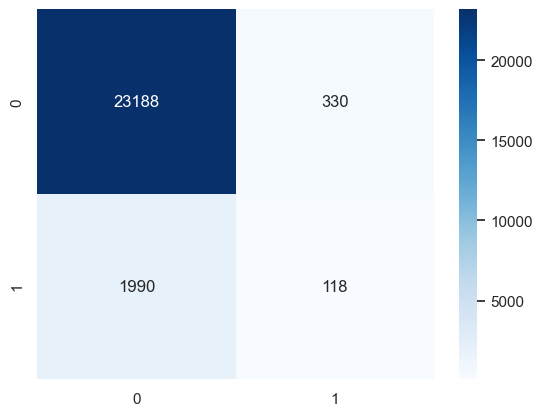

In [47]:
preds = model.predict(X_test)
c_matrix = confusion_matrix(y_test, preds)
print('Accuracy:', round(accuracy_score(y_test, preds), 5), '\n')
sns.heatmap(c_matrix, annot=True,fmt='1', cmap='Blues')

In [105]:
data1 = pd.read_parquet('./data/chunks/chunk0')
X1 = data1.drop(["TARGET"], axis=1)
y1 = data1[["TARGET"]]

In [106]:
print(classification_report(model.predict(X1), y1, digits=3))

              precision    recall  f1-score   support

         0.0      0.998     0.919     0.957    102281
         1.0      0.007     0.251     0.013       223

    accuracy                          0.918    102504
   macro avg      0.502     0.585     0.485    102504
weighted avg      0.996     0.918     0.955    102504



Accuracy: 0.91774 

0.006729960341305132 0.0017731437732924201 4.278815043095889e-10


<AxesSubplot: >

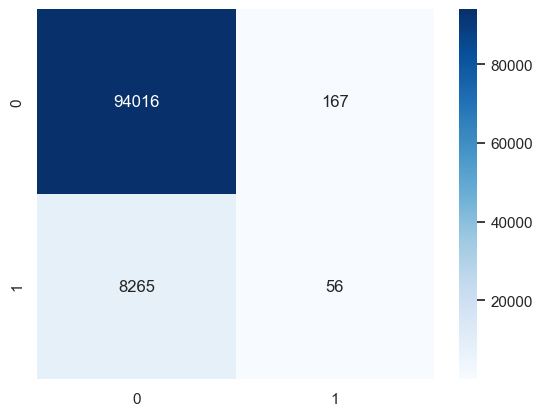

In [107]:
preds = model.predict(X1)
c_matrix = confusion_matrix(y1, preds)
print('Accuracy:', round(accuracy_score(y1, preds), 5), '\n')
print(c_matrix[1][1]/c_matrix[1].sum(), c_matrix[0][1]/c_matrix[0].sum(),c_matrix[1][1]/c_matrix[1].sum()/c_matrix[0][1]/c_matrix[0].sum())
sns.heatmap(c_matrix, annot=True,fmt='1', cmap='Blues')

In [73]:
c_matrix[1][1]/c_matrix[1].sum()

0.15472989489122463

In [91]:
0.2/0.9

0.22222222222222224

In [ ]:
num_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("total number of numerical Columns :", len(num_columns))
num_columns

total number of numerical Columns : 106


Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [ ]:
numericalData = data[num_columns]

In [ ]:
numericalData.isnull().sum().sort_values(ascending = False)/len(numericalData)*100

COMMONAREA_MODE             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MEDI             69.872297
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
                              ...    
REG_CITY_NOT_LIVE_CITY       0.000000
TARGET                       0.000000
FLAG_DOCUMENT_2              0.000000
FLAG_DOCUMENT_3              0.000000
SK_ID_CURR                   0.000000
Length: 106, dtype: float64

In [ ]:
numericalData.columns[numericalData.isnull().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPART

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy="median")
# scaler = StandardScaler()

numericalData = pd.DataFrame(imputer.fit_transform(numericalData), columns=num_columns) # Handling Missing Data
# numericalData = pd.DataFrame(scaler.fit_transform(numericalData), columns=num_columns) # Data Normalization 
numericalData.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cat_columns = data.select_dtypes(include=['object']).columns
print("total number of categorical Columns :", len(cat_columns))
cat_columns

total number of categorical Columns : 16


Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [ ]:
categoricalData = data[cat_columns]

In [ ]:
len(categoricalData)

307511

In [ ]:
categoricalData.isnull().sum().sort_values(ascending = False)/len(categoricalData)*100

FONDKAPREMONT_MODE            68.386172
WALLSMATERIAL_MODE            50.840783
HOUSETYPE_MODE                50.176091
EMERGENCYSTATE_MODE           47.398304
OCCUPATION_TYPE               31.345545
NAME_TYPE_SUITE                0.420148
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
dtype: float64

In [ ]:
categoricalData.columns[categoricalData.isnull().any()]

Index(['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [ ]:
categoricalData.columns[categoricalData.isnull().any()]

Index(['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer

ordinal_encoder = OrdinalEncoder()
# imputer = KNNImputer(n_neighbors=1)

categoricalData = pd.DataFrame(ordinal_encoder.fit_transform(categoricalData), columns=cat_columns) # convert categorical features (discrete) to ordinal integers  

for c in categoricalData.columns[categoricalData.isnull().any()]:
    categoricalData[c] = categoricalData[c].fillna(categoricalData[c].mode()[0])

# imputer = imputer.fit(categoricalData)
# categoricalData = pd.DataFrame(imputer.transform(categoricalData), columns=cat_columns) # Handling Missing Data
# categoricalData = pd.DataFrame(scaler.fit_transform(categoricalData), columns=cat_columns) # Data Normalization
categoricalData.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0.0,1.0,0.0,1.0,6.0,7.0,4.0,3.0,1.0,8.0,6.0,5.0,2.0,0.0,5.0,0.0
1,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,1.0,3.0,1.0,39.0,2.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,6.0,7.0,4.0,3.0,1.0,8.0,1.0,11.0,2.0,0.0,4.0,0.0
3,0.0,0.0,0.0,1.0,6.0,7.0,4.0,0.0,1.0,8.0,6.0,5.0,2.0,0.0,4.0,0.0
4,0.0,1.0,0.0,1.0,6.0,7.0,4.0,3.0,1.0,3.0,4.0,37.0,2.0,0.0,4.0,0.0


In [ ]:
_data = pd.concat([categoricalData,numericalData],axis=1, join='inner')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

In [ ]:
X = _data.drop(["TARGET"], axis=1)
y = _data[["TARGET"]]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
train, test = train_test_split(_data)# X_val
X_train = train.drop(["TARGET"], axis=1)
y_train = train[["TARGET"]]

X_test = test.drop(["TARGET"], axis=1)
y_test = test[["TARGET"]]

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
X_train.shape,y_train.shape

((230633, 121), (230633, 1))

In [ ]:
X_test.shape,y_test.shape

((76878, 121), (76878, 1))

In [ ]:
ifm = IsolationForest()

In [ ]:
ifm.fit(X_train)

IsolationForest()

In [ ]:
y_pred = ifm.predict(X_train)
y_pred = [1 if pred == -1 else 0 for pred in y_pred]

In [ ]:
print(classification_report(y_pred, y, digits=3))

              precision    recall  f1-score   support

           0      0.752     0.917     0.826    231904
           1      0.222     0.073     0.110     75607

    accuracy                          0.709    307511
   macro avg      0.487     0.495     0.468    307511
weighted avg      0.622     0.709     0.650    307511



In [ ]:
y.value_counts()

TARGET
0.0       282686
1.0        24825
dtype: int64

In [ ]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 13.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=4b9b437703fd8703f70a51fa3d1d36449fe802dc235cae1932d082c0a2deb4b3
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=dc121d35c3e4398242b9cc7a982611056a4056caae803f1ac18e17267e30524d
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [ ]:
pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 4.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2340281 sha256=7529b5b0a0184250d15569b9f121f5516cb99f023df55b07b77151a1194b6d40
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [ ]:
import hdbscan
from umap import UMAP

In [ ]:
umap_model = UMAP(n_neighbors=20, n_components=36, min_dist=0.0, metric='cosine', low_memory=False, verbose=False)

In [ ]:
_umap_X = umap_model.fit_transform(X)

In [ ]:
hdbscan_model =hdbscan.HDBSCAN(min_cluster_size=30, metric='euclidean',cluster_selection_method='eom', prediction_data=True)
hdbscan_model.fit(_umap_X)

HDBSCAN(min_cluster_size=30, prediction_data=True)

In [ ]:
lab = hdbscan_model.labels_

In [ ]:
_umap_X[0]

array([6.697197 , 5.906508 , 5.164149 , 3.3990002, 7.601106 ],
      dtype=float32)

In [ ]:
5701/78859

0.07229358728870516

In [ ]:
pd.DataFrame(lab).value_counts()

-1      78859
 255    22875
 133    10261
 155     9472
 56      8489
        ...  
 362       32
 367       31
 43        30
 336       30
 112       30
Length: 382, dtype: int64

In [ ]:
y_pred = [1 if pred == -1 else 0 for pred in lab]

In [ ]:
labd = {}
for i in set(lab):
  labd[i] = 0

In [ ]:
for i in zip(lab,y.values):
  if i[1][0] == 1.0:
    labd[i[0]] += 1

In [ ]:
# labd = {}
for i in set(lab):
  labd[i] /= 24825/100

In [ ]:
dict(sorted(labd.items(), key=lambda item: item[1], reverse=True))

{-1: 5701,
 255: 1783,
 133: 1269,
 155: 806,
 88: 789,
 272: 758,
 289: 614,
 66: 517,
 56: 464,
 142: 462,
 257: 371,
 190: 323,
 277: 317,
 207: 276,
 359: 268,
 34: 264,
 260: 258,
 181: 254,
 51: 240,
 36: 215,
 250: 200,
 225: 184,
 176: 174,
 261: 174,
 372: 161,
 294: 155,
 130: 145,
 209: 139,
 241: 137,
 256: 131,
 8: 126,
 82: 117,
 26: 113,
 221: 109,
 238: 106,
 182: 105,
 236: 101,
 197: 95,
 380: 95,
 205: 89,
 283: 89,
 227: 86,
 154: 84,
 175: 83,
 106: 81,
 169: 81,
 231: 80,
 350: 78,
 252: 77,
 217: 72,
 87: 70,
 187: 70,
 354: 70,
 54: 68,
 71: 67,
 330: 66,
 180: 64,
 125: 63,
 199: 62,
 84: 58,
 233: 57,
 188: 56,
 263: 55,
 302: 55,
 346: 55,
 240: 54,
 265: 54,
 332: 54,
 108: 53,
 117: 53,
 249: 53,
 266: 52,
 271: 51,
 98: 50,
 321: 50,
 77: 49,
 95: 46,
 129: 46,
 101: 45,
 174: 45,
 276: 43,
 40: 42,
 63: 42,
 369: 42,
 47: 41,
 293: 40,
 324: 38,
 123: 37,
 269: 37,
 193: 35,
 214: 35,
 75: 34,
 99: 34,
 164: 33,
 237: 33,
 42: 32,
 144: 32,
 189: 32,
 229

In [ ]:
y.value_counts()

TARGET
0.0       282686
1.0        24825
dtype: int64

In [ ]:
len(data.columns)

122

In [ ]:
data_int = data[data.select_dtypes('int').columns]
data_float = data[data.select_dtypes('float').columns]
data_obj = data[data.select_dtypes('object').columns]

In [ ]:
len(data.select_dtypes('object').columns) + len(data.select_dtypes('int').columns) + len(data.select_dtypes('float').columns)

122

In [ ]:
le = LabelEncoder()
for col in data_obj.columns:
    data_obj[col] = le.fit_transform(data_obj[col].astype(str))    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
def colors(value):
    if value > 50 and value < 100:
        color = 'red'
    elif value > 154000 and value < 250000:
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color

def missing(df):
    total = df.isnull().sum().sort_values(ascending = False)
    total = total[total>0]
    percent = df.isnull().sum().sort_values(ascending = False)/len(df)*100
    percent = percent[percent>0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percentage']).style.applymap(colors)
missing(data_obj.select_dtypes('object'))

,Total,Percentage


In [ ]:
data_obj.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0,1,0,1,6,7,4,3,1,8,6,5,3,0,5,0
1,0,0,0,0,1,4,1,1,1,3,1,39,3,0,0,0
2,1,1,1,1,6,7,4,3,1,8,1,11,0,1,7,2
3,0,0,0,1,6,7,4,0,1,8,6,5,0,1,7,2
4,0,1,0,1,6,7,4,3,1,3,4,37,0,1,7,2


In [ ]:
data_float.isnull().sum()

AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
REGION_POPULATION_RELATIVE        0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 65, dtype: int64

In [ ]:
_data = data.copy()

In [ ]:
_data.memory_usage().sum() / 1024**2

286.2270965576172

In [ ]:
for col in _data.columns:
    _type = _data[col].dtype
    if _type != object:
        _min, _max = _data[col].min(), _data[col].max()
        if str(_type)[:3] == 'int':
            if _min > np.iinfo(np.int8).min and _max < np.iinfo(np.int8).max:_data[col] = _data[col].astype(np.int8)
            elif _min > np.iinfo(np.int16).min and _max < np.iinfo(np.int16).max:_data[col] = _data[col].astype(np.int16)
            elif _min > np.iinfo(np.int32).min and _max < np.iinfo(np.int32).max:_data[col] = _data[col].astype(np.int32)
            elif _min > np.iinfo(np.int64).min and _max < np.iinfo(np.int64).max:_data[col] = _data[col].astype(np.int64)
        else:
            if _min > np.finfo(np.float16).min and _max < np.finfo(np.float16).max:_data[col] = _data[col].astype(np.float16)
            elif _min > np.finfo(np.float32).min and _max < np.finfo(np.float32).max:_data[col] = _data[col].astype(np.float32)
            else: _data[col] = _data[col].astype(np.float64)
    else: _data[col] = _data[col].astype('object')

In [ ]:
_data.memory_usage().sum() / 1024**2

92.37870502471924

In [ ]:
cat_col = _data.select_dtypes('object').columns
cat_col

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [ ]:
le = LabelEncoder()
for col in cat_col:
    _data[col] = le.fit_transform(_data[col].astype(str))

In [ ]:
def colors(value):
    if value > 50 and value < 100:
        color = 'red'
    elif value > 154000 and value < 250000:
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color

def missing(df):
    total = df.isnull().sum().sort_values(ascending = False)
    total = total[total>0]
    percent = df.isnull().sum().sort_values(ascending = False)/len(df)*100
    percent = percent[percent>0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percentage']).style.applymap(colors)
missing(data.select_dtypes('object'))

,Total,Percentage
FONDKAPREMONT_MODE,210295,68.386172
WALLSMATERIAL_MODE,156341,50.840783
HOUSETYPE_MODE,154297,50.176091
EMERGENCYSTATE_MODE,145755,47.398304
OCCUPATION_TYPE,96391,31.345545
NAME_TYPE_SUITE,1292,0.420148


In [ ]:
for c in data.select_dtypes('object').columns[data.select_dtypes('object').isnull().any()]:
    data[c] = data[c].fillna(data[c].mode()[0])
missing(data.select_dtypes('object'))

,Total,Percentage


In [ ]:
data.describe(include=['O'])

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,249818,158774,218391,196432,272868,151577,53901,67992,284125,304800,222381,305183


In [ ]:
_data.select_dtypes('int').columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DO

In [ ]:
missing(data.select_dtypes('int'))

,Total,Percentage


In [ ]:
data.select_dtypes('float').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

In [ ]:
missing(data.select_dtypes('float'))

,Total,Percentage
COMMONAREA_MODE,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
FLOORSMIN_MEDI,208642,67.848630


In [ ]:
len(data.columns)

64

In [ ]:
data = data.select_dtypes('float').interpolate(method ='linear', limit_direction ='forward')
missing(data.select_dtypes('float'))

,Total,Percentage
OWN_CAR_AGE,2,0.000650


In [ ]:
data = data.dropna(axis = 1)
missing(data)

,Total,Percentage


In [ ]:
data

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_ME